<a href="https://colab.research.google.com/github/Poorna3797/task7/blob/main/assign10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
names = ['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass Type']
df = pd.read_csv('trainKNN.txt', sep = ',', header = None, names = names)

In [ ]:
df.head()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.isnull().sum()

Id            0
Ri            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass Type    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          196 non-null    int64  
 1   Ri          196 non-null    float64
 2   Na          196 non-null    float64
 3   Mg          196 non-null    float64
 4   Al          196 non-null    float64
 5   Si          196 non-null    float64
 6   K           196 non-null    float64
 7   Ca          196 non-null    float64
 8   Ba          196 non-null    float64
 9   Fe          196 non-null    float64
 10  Glass Type  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [ ]:
df['Glass Type'].value_counts()

2    73
1    67
7    26
3    14
5    10
6     6
Name: Glass Type, dtype: int64

<AxesSubplot:title={'center':'Types of glasses'}>

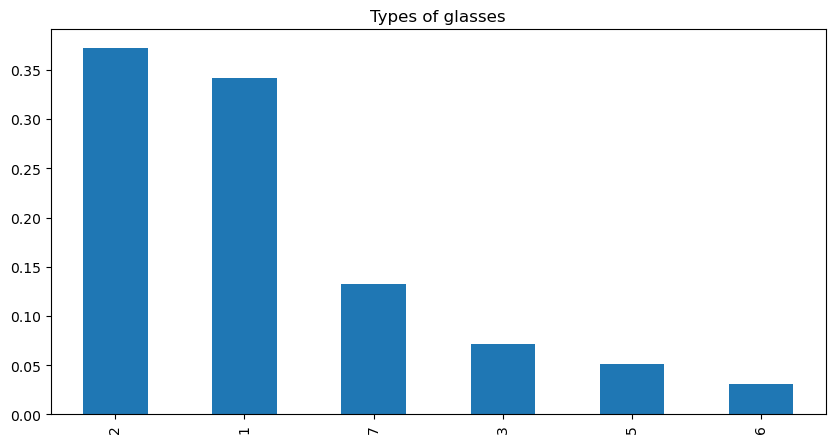

In [ ]:
plt.figure(1)
df['Glass Type'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Types of glasses')

In [ ]:
features = names[1:-1]

C:\Users\wiki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


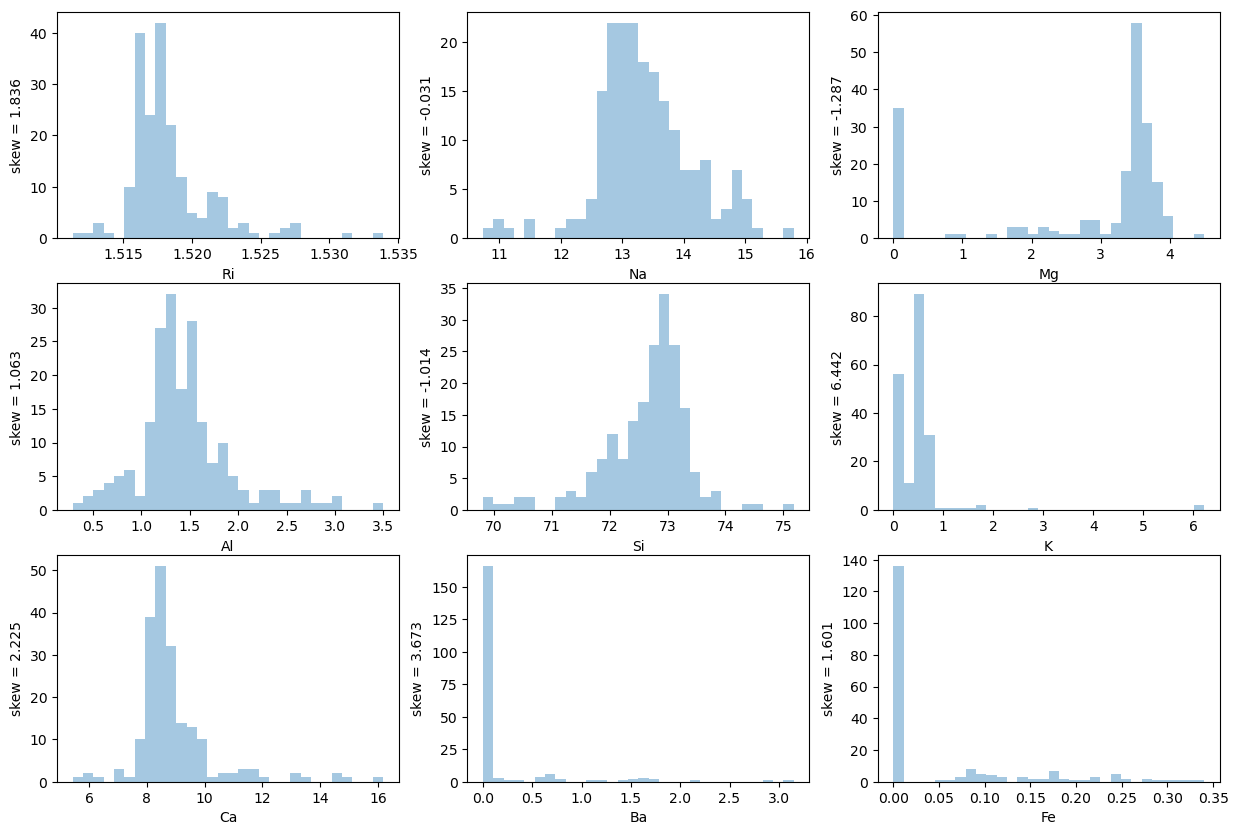

In [ ]:
plt.figure(figsize = (15,10))
for i in range(len(features)):
    plt.subplot(3, 3, i+1)
    col = features[i]
    skew = df[col].skew()
    sns.distplot(df[col], kde = False, bins = 30)
    plt.ylabel('skew = {}'.format(round(skew, 3)))
    plt.xlabel(col)
    #plt.show()

<Figure size 800x800 with 0 Axes>

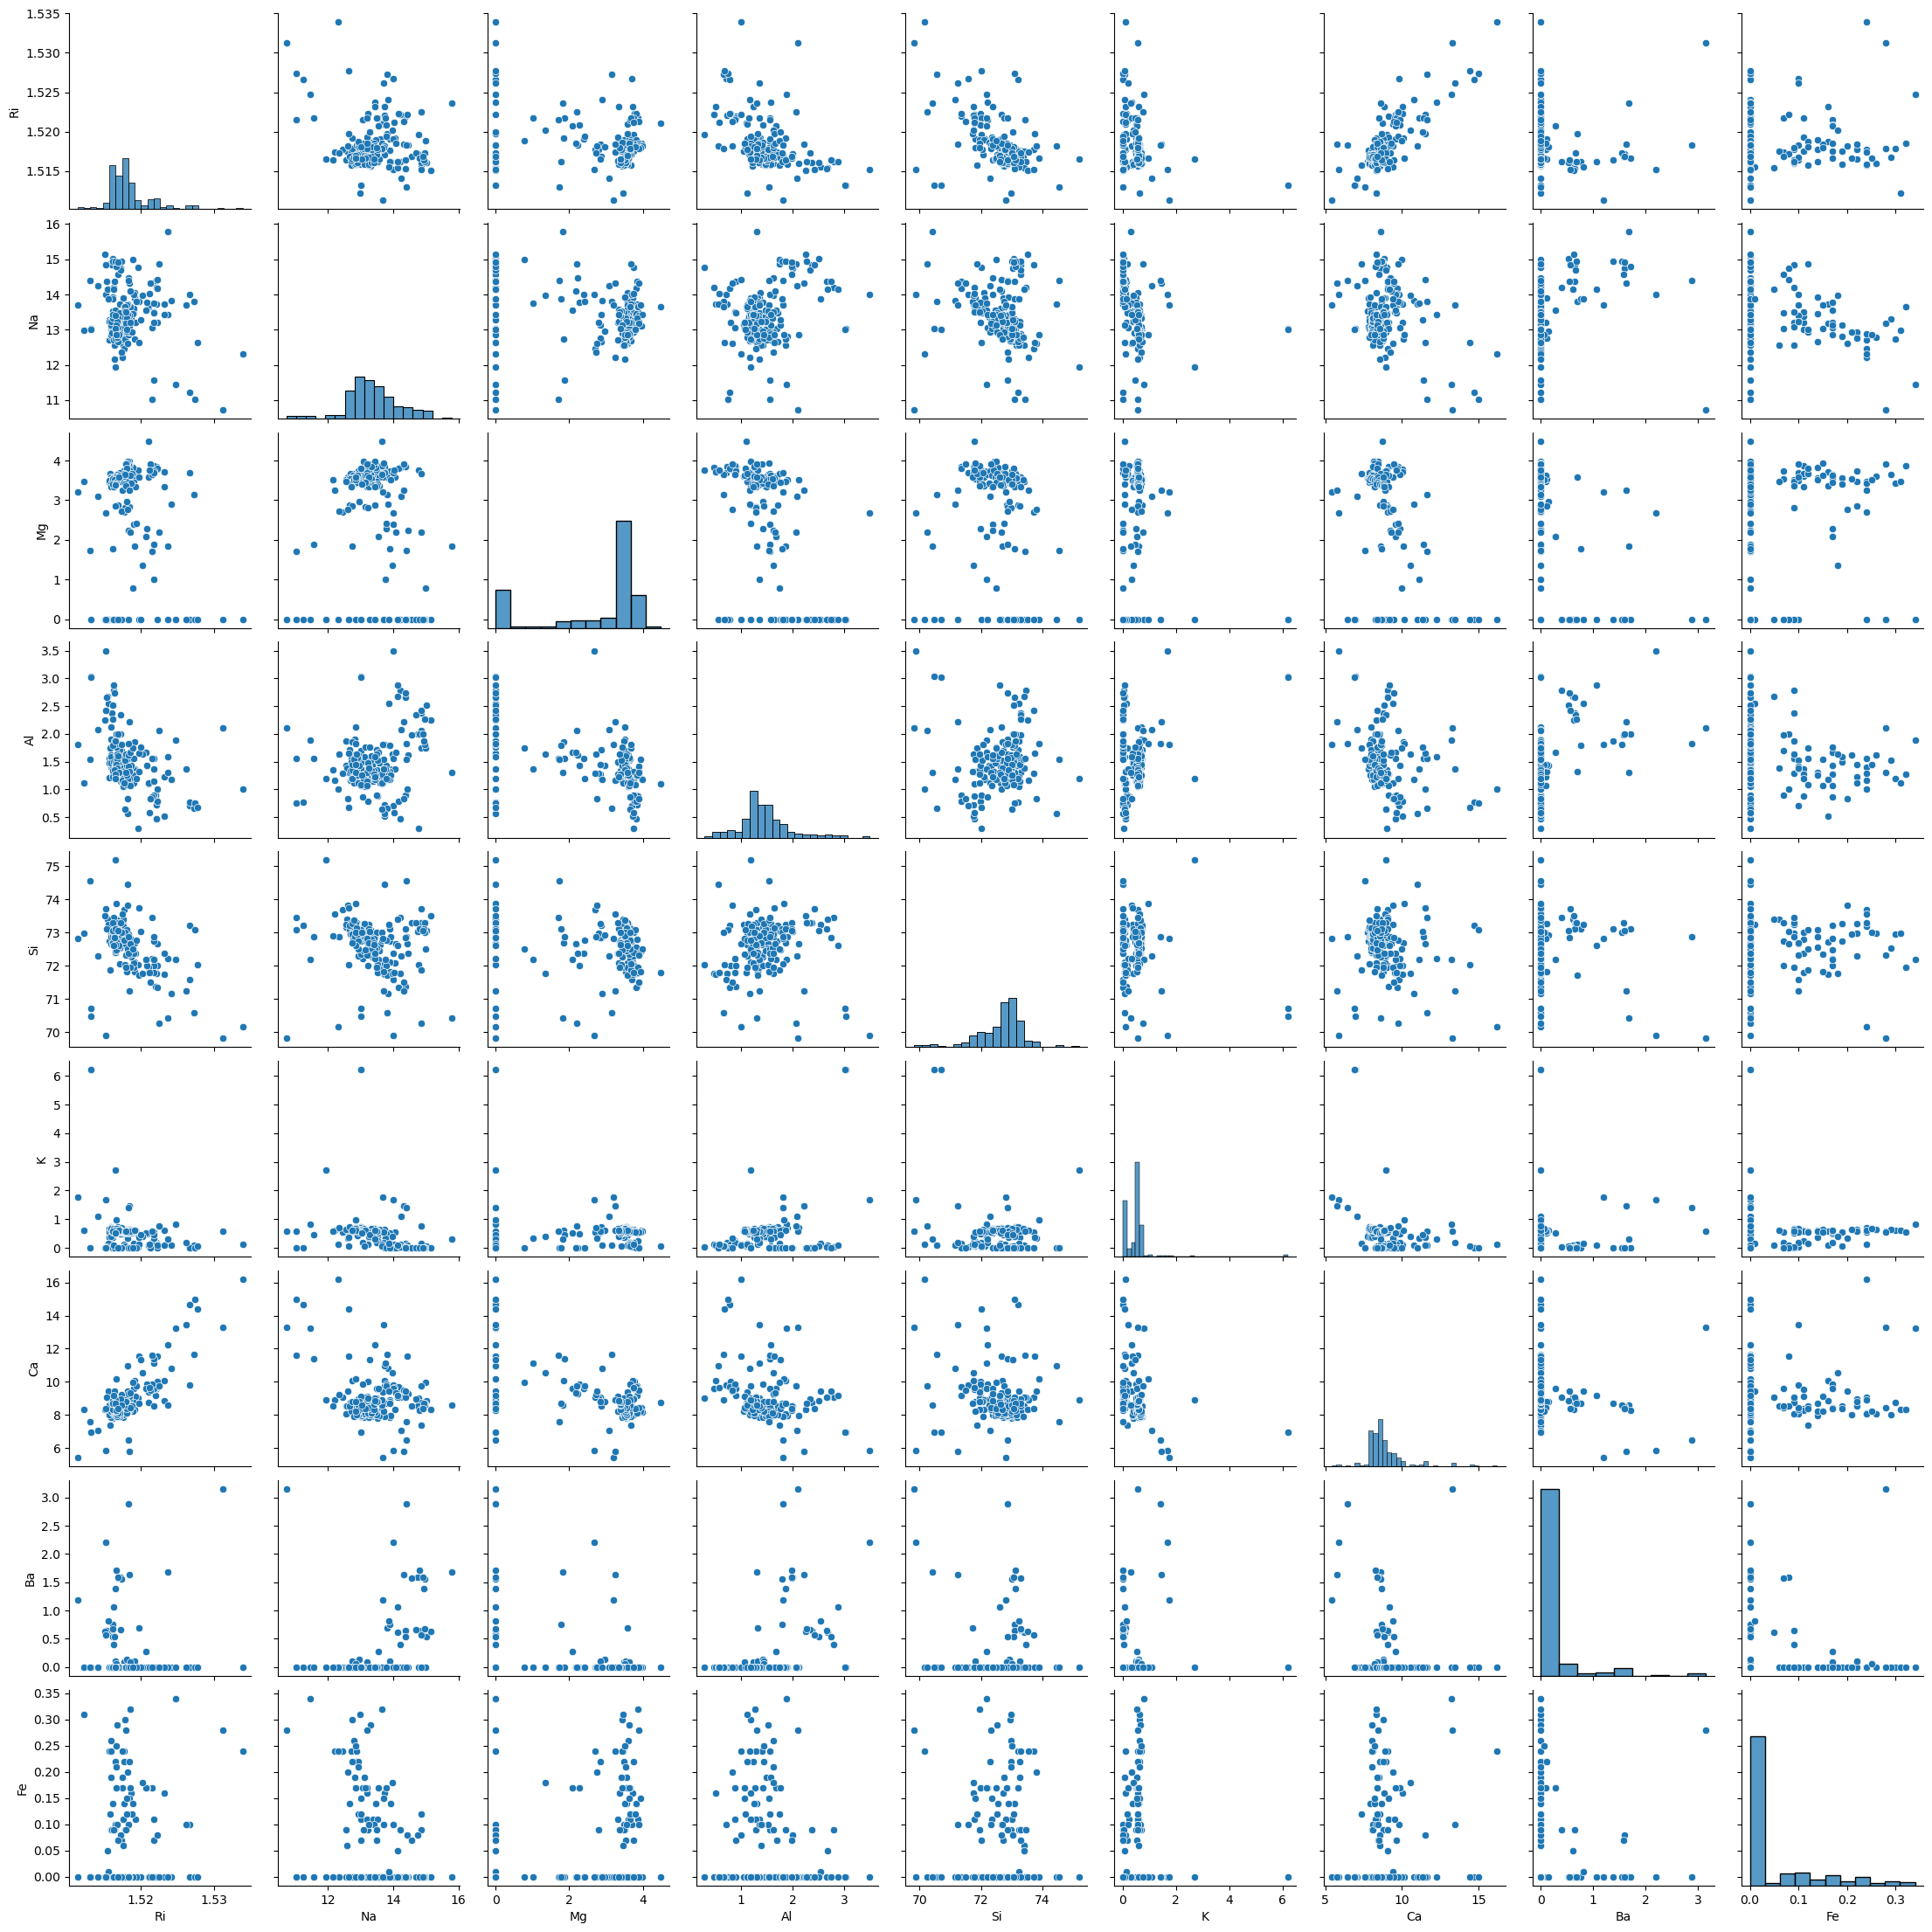

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

### Looking for outliers

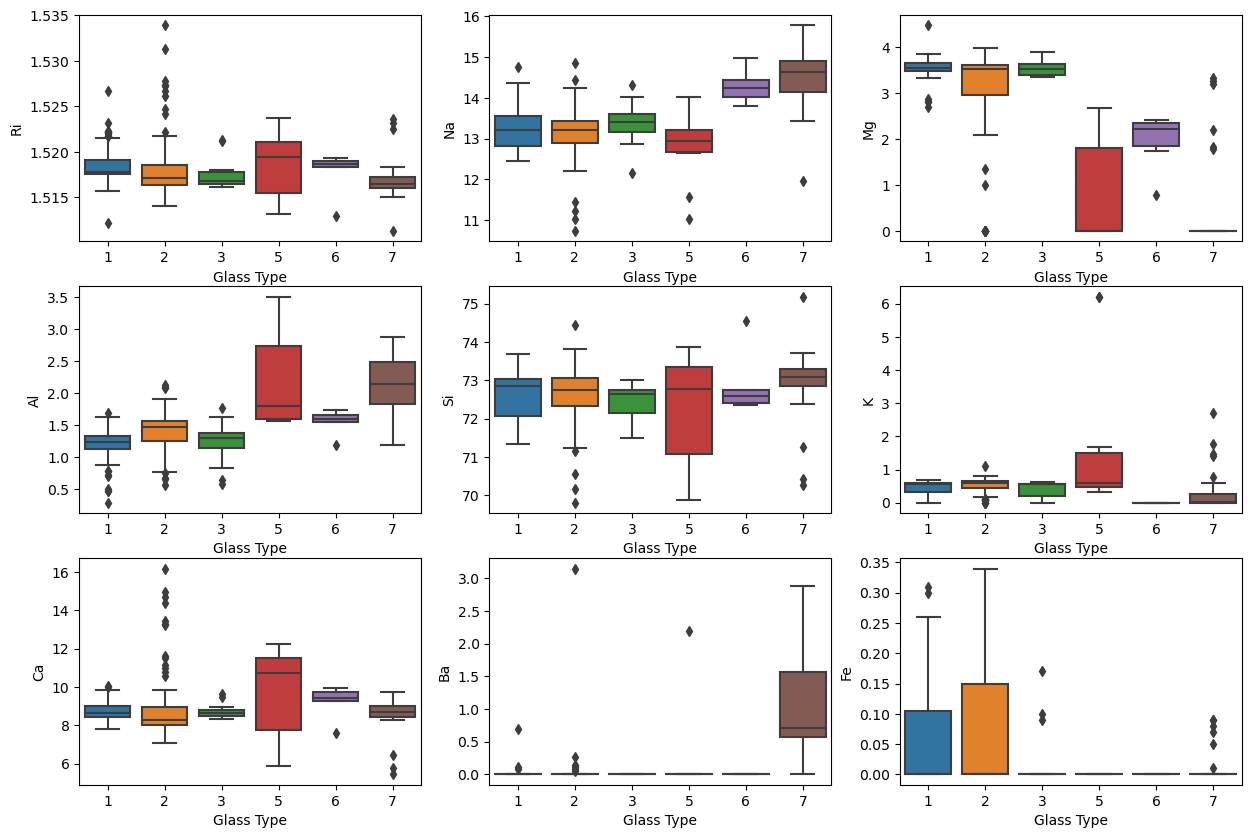

In [ ]:
plt.figure(figsize = (15,10))
for x in range(len(features)):
    plt.subplot(3, 3, x+1)
    col = features[x]
    sns.boxplot(x = df['Glass Type'], y = df[col])

### Dropping outliers

In [ ]:
for v in features:
    outlier_index = []
    q1 = np.percentile(df[v], 25)
    q3 = np.percentile(df[v], 75)
    iqr = q3 - q1
    upp_lim = q3 + (1.5 * iqr)
    low_lim = q1 - (1.5 * iqr)
    col_index = df[(df[v] < low_lim) | (df[v] > upp_lim)].index
    outlier_index.extend(col_index)

In [ ]:
df = df.drop(outlier_index).reset_index(drop=True)

In [ ]:
X = df[features]
y = df[['Glass Type']]

In [ ]:
df_test = pd.read_csv('testKNN.txt', sep = ',', header = None, names = names)

In [ ]:
X_test = df_test.drop(['Glass Type', 'Id'], axis = 1)
y_test = df_test[['Glass Type']]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
manhattan_test_score = []
manhattan_train_score = []
euclidean_test_score = []
euclidean_train_score = []
k_neighbors = []
for k in range(2,10):
    knn_euc = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn_man = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn_man.fit(X, y)
    knn_euc.fit(X, y)
    k_neighbors.append(k)
    predict_man = knn_man.predict(X_test)
    predict_euc = knn_euc.predict(X_test)
    manhattan_train_score.append(knn_man.score(X, y))
    manhattan_test_score.append(knn_man.score(X_test, y_test))
    euclidean_train_score.append(knn_euc.score(X, y))
    euclidean_test_score.append(knn_euc.score(X_test, y_test))

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [ ]:
df_score = pd.DataFrame()
df_score['k_neighbors'] = k_neighbors
df_score['manhattan_train_score'] = manhattan_train_score
df_score['manhattan_test_score'] = manhattan_test_score
df_score['euclidean_train_score'] = euclidean_train_score
df_score['euclidean_test_score'] = euclidean_test_score

In [ ]:
df_score

,k_neighbors,manhattan_train_score,manhattan_test_score,euclidean_train_score,euclidean_test_score
0,2,0.884615,0.444444,0.868132,0.444444
1,3,0.873626,0.555556,0.846154,0.611111
2,4,0.818681,0.500000,0.791209,0.444444
3,5,0.802198,0.444444,0.769231,0.500000
4,6,0.774725,0.444444,0.747253,0.500000
5,7,0.763736,0.444444,0.741758,0.444444
6,8,0.741758,0.444444,0.714286,0.444444
7,9,0.719780,0.444444,0.692308,0.444444


#### Based on the above table, the best parameter is :
##### k_neighbors	             :          3	 
##### manhattan_train_score	 :      0.873626	   
##### manhattan_test_score	 :      0.555556	
##### euclidean_train_score	 :      0.846154	                   
##### euclidean_test_score     :      0.611111


#### Classification Report For K_neigbor = 3, For Both Manhattan And Euclidean Metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
knn_euc = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn_man = KNeighborsClassifier(n_neighbors = 3, metric='manhattan')
knn_man.fit(X, y)
knn_euc.fit(X, y)
k_neighbors.append(k)
predict_man = knn_man.predict(X_test)
predict_euc = knn_euc.predict(X_test)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
target_names = ['Type 1', 'Type 2', 'Type 3', 'Type 5', 'Type 6', 'Type 7']
manhattan_report = classification_report(y_test, predict_man,target_names = target_names, output_dict=False)
euclidean_report = classification_report(y_test, predict_euc,target_names = target_names, output_dict=False)

C:\Users\wiki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wiki\anaconda3\lib\site-packages\sklearn\metrics\

In [ ]:
print('Classification Report For Manhattan Metrics is :')
print(manhattan_report)
print('Classification Report For Euclidean Metrics is :')
print(euclidean_report)

Classification Report For Manhattan Metrics is :
              precision    recall  f1-score   support

      Type 1       0.43      1.00      0.60         3
      Type 2       0.25      0.33      0.29         3
      Type 3       1.00      0.33      0.50         3
      Type 5       1.00      0.67      0.80         3
      Type 6       0.00      0.00      0.00         3
      Type 7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.57      0.56      0.51        18
weighted avg       0.57      0.56      0.51        18

Classification Report For Euclidean Metrics is :
              precision    recall  f1-score   support

      Type 1       0.50      1.00      0.67         3
      Type 2       0.25      0.33      0.29         3
      Type 3       1.00      0.67      0.80         3
      Type 5       1.00      0.67      0.80         3
      Type 6       0.00      0.00      0.00         3
      Type 7       0.75      1.00 